# Bike Sharing Dataset

1:spring
2:summer
3:fall
4:winter

In [1]:
# Biblioteki
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
from sklearn import model_selection

In [4]:
# Wczytanie datasetu z pliku.csv
data = pd.read_csv('data/hour.csv')
print(data.shape)

(17379, 17)


In [5]:
#Informacje o datasecie
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [6]:
# Typy danych w kolumnach
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
# Zmiana nazw kolumn
data.rename(columns={'weathersit':'weather',
                     'mnth':'month',
                     'hr':'hour',
                     'hum': 'humidity',
                     'cnt':'count'},inplace=True)

In [8]:
# Usunięcie dteday, instant i yr (niepotrzebne kolumny +  rok sie nie powtarza)
data = data.drop(['instant','dteday','yr'], axis=1)

In [9]:
# Zamiana zmiennych numerycznych na kategoryjne
data['season'] = data.season.astype('category')
data['month'] = data.month.astype('category')
data['hour'] = data.hour.astype('category')
data['holiday'] = data.holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['workingday'] = data.workingday.astype('category')
data['weather'] = data.weather.astype('category')

In [10]:
data.dtypes

season        category
month         category
hour          category
holiday       category
weekday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

[Text(0, 0.5, 'liczba'),
 Text(0.5, 0, 'godzina'),
 Text(0.5, 1.0, 'Uzycie systemu w tygodniu (dni robocze) i weekendy')]

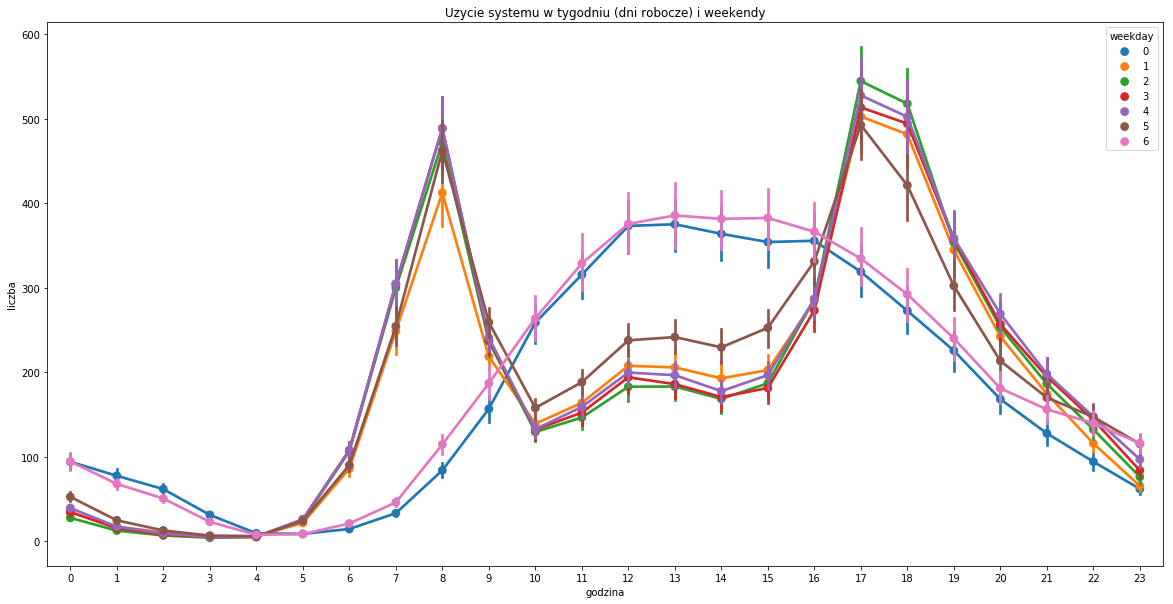

In [11]:
# Wizualizacja
fig, ax = plt.subplots(figsize=(20,10))

sn.pointplot(data=data[['hour',
                       'count',
                       'weekday']],
            x='hour', y='count',
            hue='weekday', ax=ax)

ax.set(xlabel="godzina", ylabel="liczba", title="Uzycie systemu w tygodniu (dni robocze) i weekendy")

Widzimy, że użycie jest inne w dni robocze i weekendy. W niedziele i soboty ludzie korzystają z większej ilości rowerów w godzinach popołudniowych,  podczas gdy w dni robocze rowery są zazwyczaj używane i pochodzą z pracy / szkoły.

[Text(0, 0.5, 'zwykli uzytkownicy'),
 Text(0.5, 0, 'godzina'),
 Text(0.5, 1.0, 'Uzycie systemu przez zwyklych uzytkownikow')]

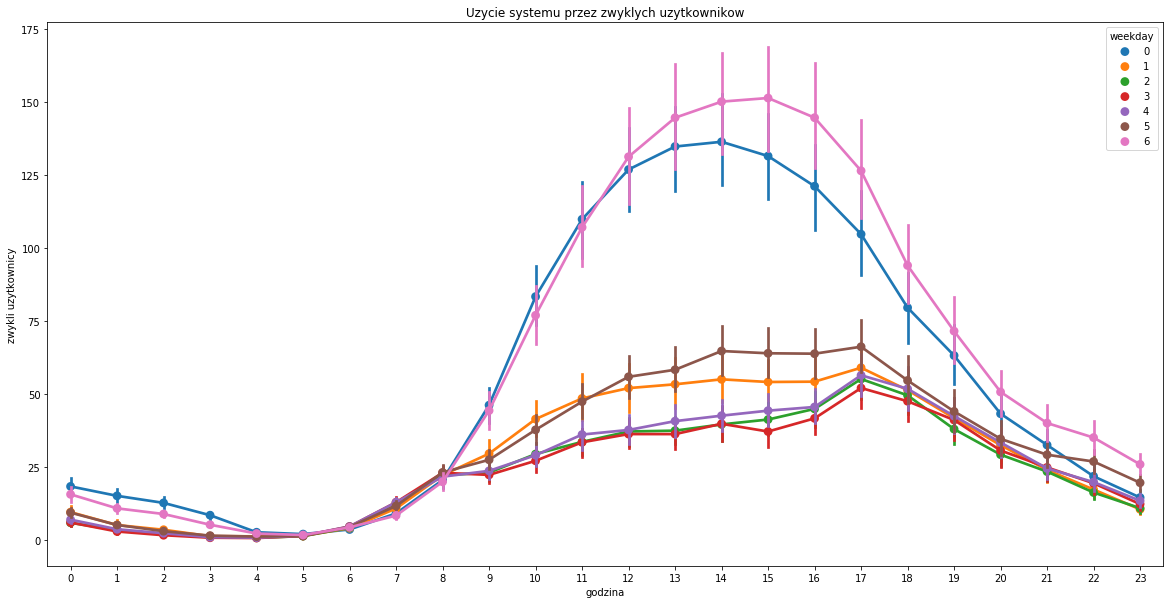

In [12]:
fig, ax = plt.subplots(figsize=(20,10))

sn.pointplot(data=data[['hour',
                       'casual',
                       'weekday']],
            x='hour', y='casual',
            hue='weekday', ax=ax)

ax.set(xlabel="godzina", ylabel="zwykli uzytkownicy",title="Uzycie systemu przez zwyklych uzytkownikow")

[Text(0, 0.5, 'zarejestrowani uzytkownicy'),
 Text(0.5, 0, 'godzina'),
 Text(0.5, 1.0, 'Uzycie systemu przez uzytkownikow zarejestrowanych')]

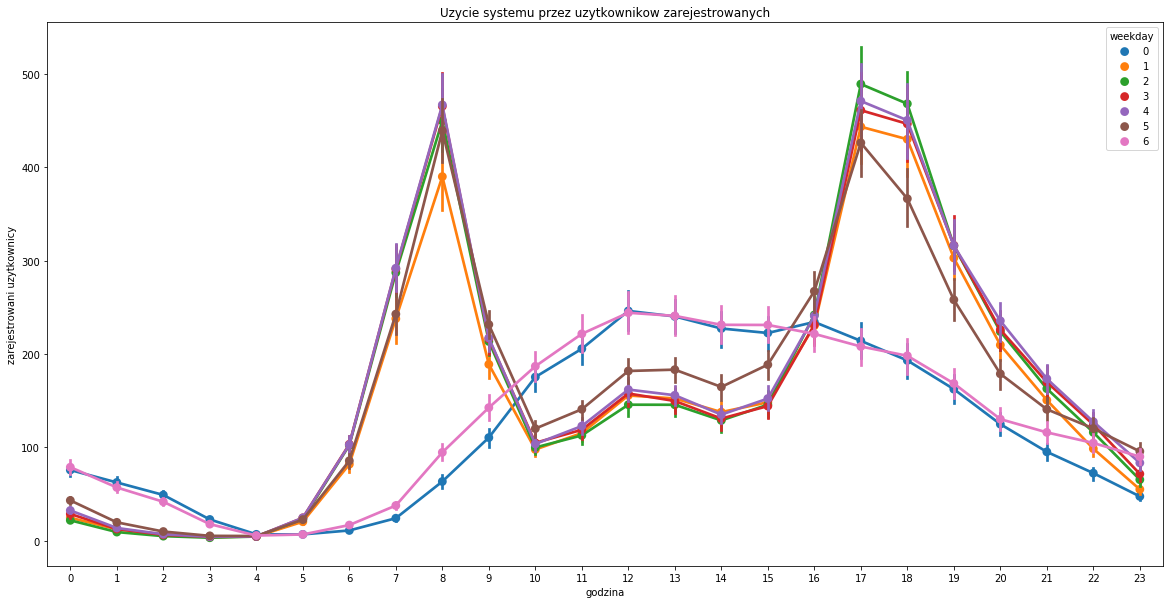

In [13]:
fig, ax = plt.subplots(figsize=(20,10))

sn.pointplot(data=data[['hour',
                       'registered',
                       'weekday']],
            x='hour', y='registered',
            hue='weekday', ax=ax)

ax.set(xlabel="godzina", ylabel="zarejestrowani uzytkownicy",title="Uzycie systemu przez uzytkownikow zarejestrowanych")

Zwykli użytkownicy używają rowerów w ciągu popołudnia przez cały tydzień, podczas gdy zarejestrowani użytkownicy wypoczywają w weekendy i chodzą do pracy w dni robocze

[Text(0, 0.5, 'liczba'),
 Text(0.5, 0, 'godzina'),
 Text(0.5, 1.0, 'Uzycie systemu wg warunkow pogodowych')]

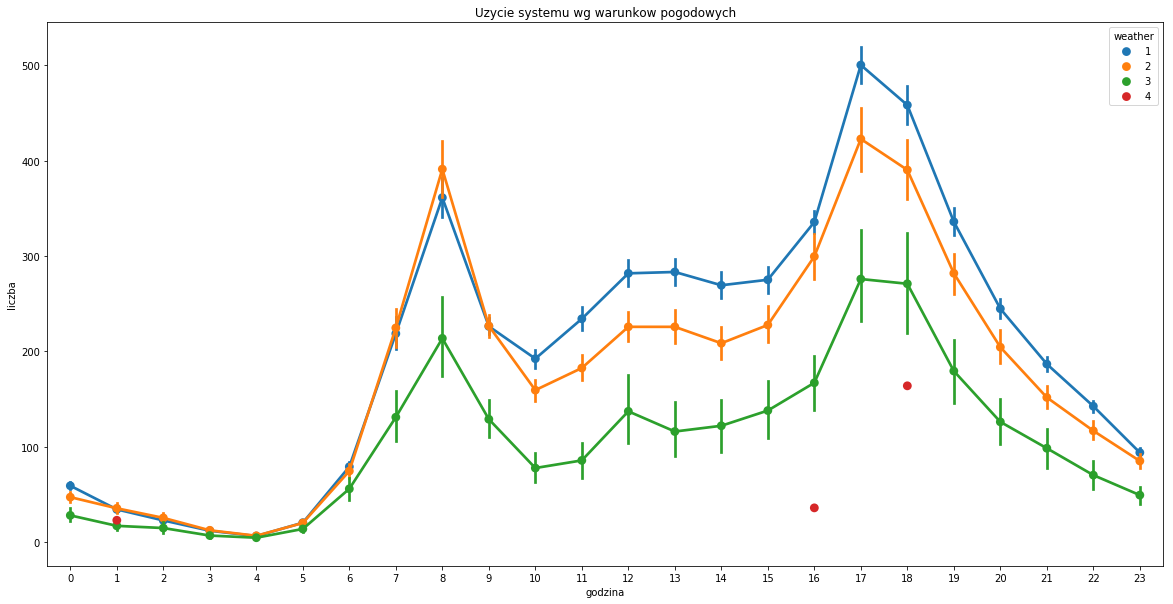

In [14]:
fig, ax = plt.subplots(figsize=(20,10))

sn.pointplot(data=data[['hour',
                       'count',
                       'weather']],
            x='hour', y='count',
            hue='weather', ax=ax)

ax.set(xlabel="godzina", ylabel="liczba",title="Uzycie systemu wg warunkow pogodowych")

[Text(0, 0.5, 'liczba'),
 Text(0.5, 0, 'godzina'),
 Text(0.5, 1.0, 'Uzycie systemu wg por roku')]

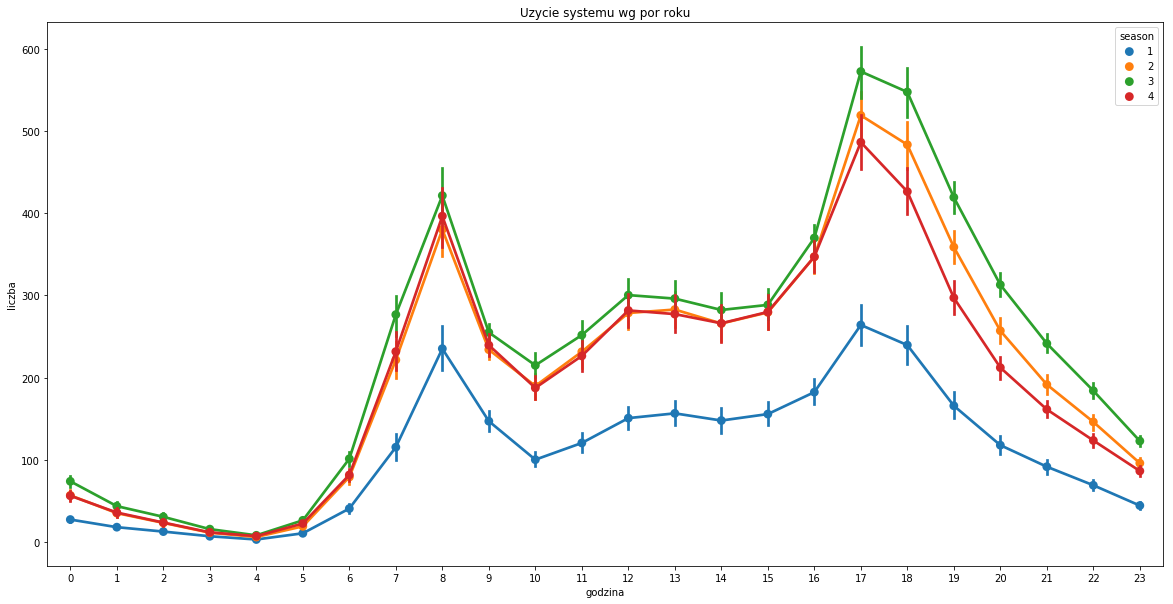

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

sn.pointplot(data=data[['hour',
                       'count',
                       'season']],
            x='hour', y='count',
            hue='season', ax=ax)

ax.set(xlabel="godzina", ylabel="liczba",title="Uzycie systemu wg por roku")

Widzimy, że ludzie używają więcej systemu, gdy jest słonecznie i jesienią. Zwykle używają rowerów w mniejszym stopniu w okresie wiosennym.

[Text(0, 0.5, 'liczba'),
 Text(0.5, 0, 'miesiac'),
 Text(0.5, 1.0, 'Rozklad uzycia na miesiac')]

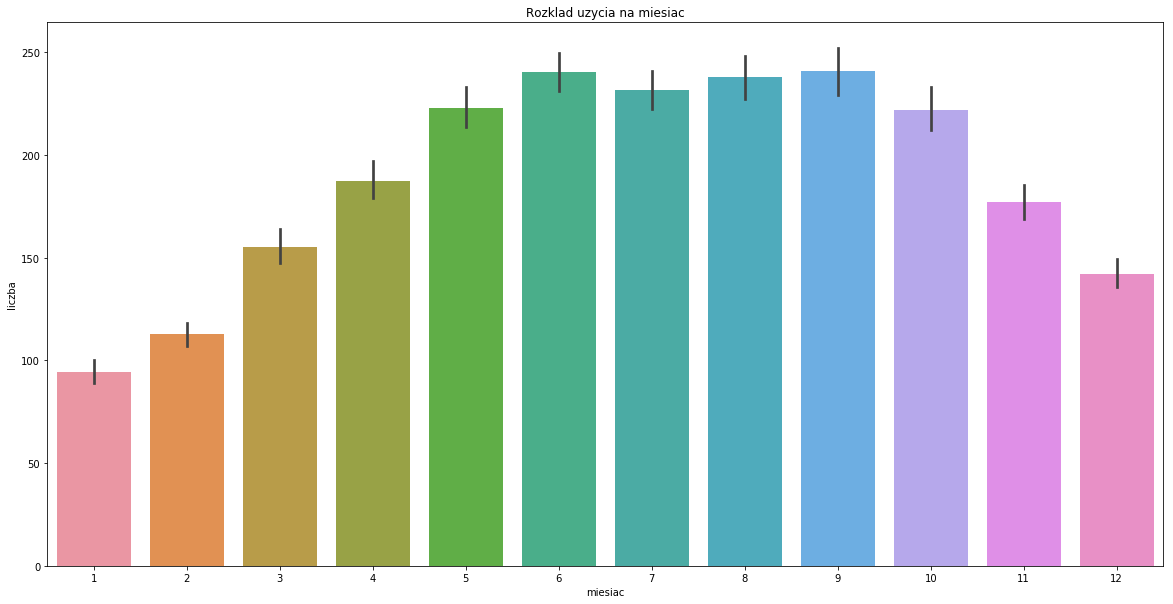

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=data[['month',
                      'count']],
            x='month', y='count')
ax.set(xlabel="miesiac", ylabel="liczba",title="Rozklad uzycia na miesiac")

[Text(0, 0.5, 'liczba'),
 Text(0.5, 0, 'dzien tygodnia'),
 Text(0.5, 1.0, 'Rozklad uzycia dzienny')]

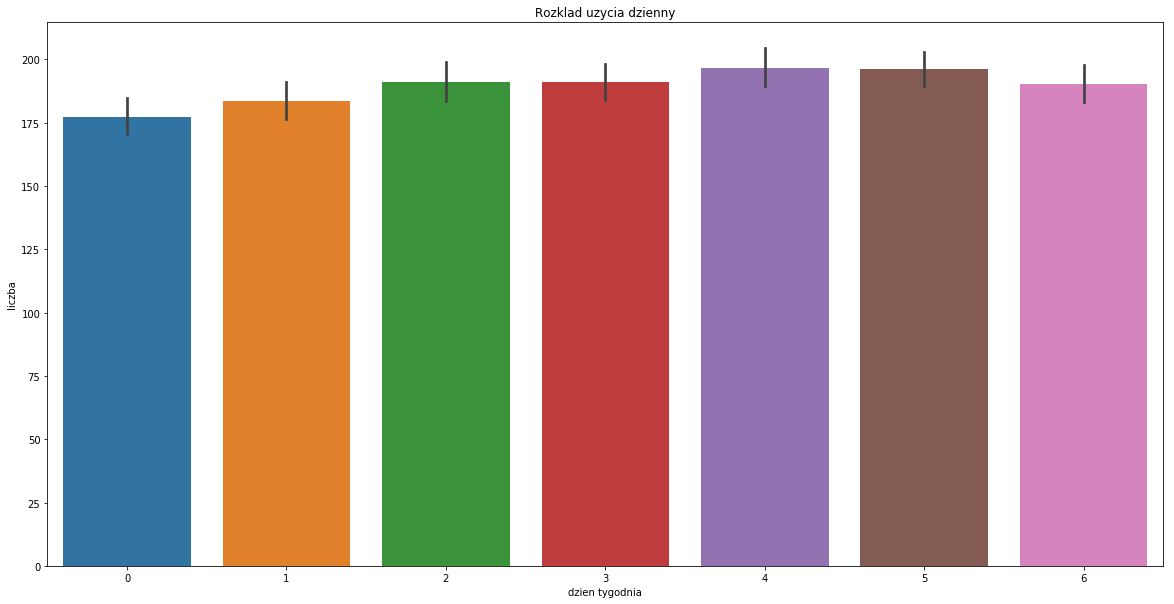

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sn.barplot(data=data[['weekday',
                      'count']],
            x='weekday', y='count')
ax.set(xlabel="dzien tygodnia", ylabel="liczba",title="Rozklad uzycia dzienny")

Jeśli sprawdzimy miesięczną dystrybucję, lepiej to zobaczymy. Jeśli jednak sprawdzimy codzienną dystrybucję, nie zauważymy dużej różnicy w korzystaniu z systemu.

Powinno się poszukać korelacji danych, aby zobaczyć, jak zmienne są ze sobą powiązane. Jeśli będziemy chcieli zastosowsać regresję liniową jako nasz model predykcyjny, nie można mieć wieloliniowsości, a dystrybucja danych musi być normalna.
 
Założenia analizy regresji są następujące:
	- Próbki muszą reprezentować modelowaną populację.
	- Niezależne zmienne są liniowo niezależne.
	- Wariancja błędu jest spójna w całej próbce.

Innym problemem są zmienne registered i casual. Nie możemy mieć liczby użytkowników, bo to jest to, co staramy się przewsidzieć. Dodatkowo, ponieważ count jest dekompozycją tych dwóch zmiennych, możemy mieć problemy, jeśli pozostają na zestawie danych. Usuwamy obie zmienne.

Korelacja zmiennych windspeed z count jest tak niska, że nie uwzględnimy jej nawet w modelu. Usuwsamy obie zmienne.

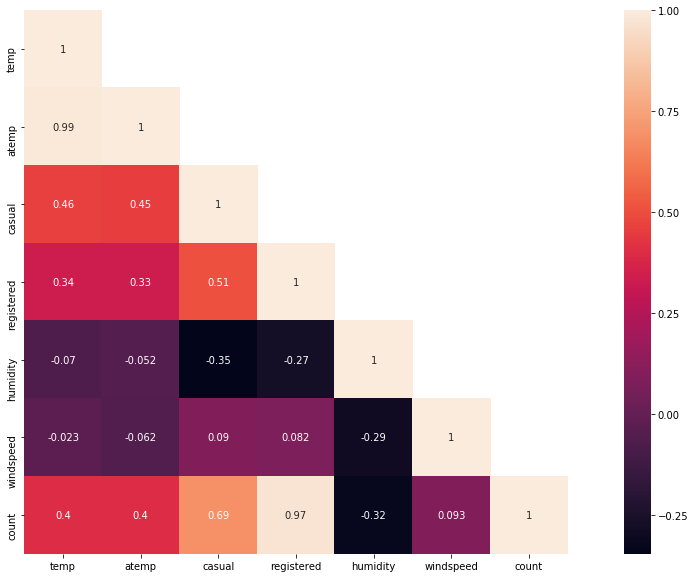

In [18]:
#Korelacja
data_correlation = data[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']].corr()

mask = np.array(data_correlation)
mask[np.tril_indices_from(mask)] = False

fig = plt.subplots(figsize=(20,10))
sn.heatmap(data_correlation, mask=mask, vmax=1, square=True, annot=True)

In [19]:
data = data.drop(['atemp', 'casual', 'registered', 'windspeed'], axis=1)

[Text(0, 0.5, 'liczba'),
 Text(0.5, 0, 'wilgotnosc powietrza'),
 Text(0.5, 1.0, 'Zwiazek pomiedzy wigotnoscia powietrza, a wszystkimi uzytkownikami (humidity oraz total users)')]

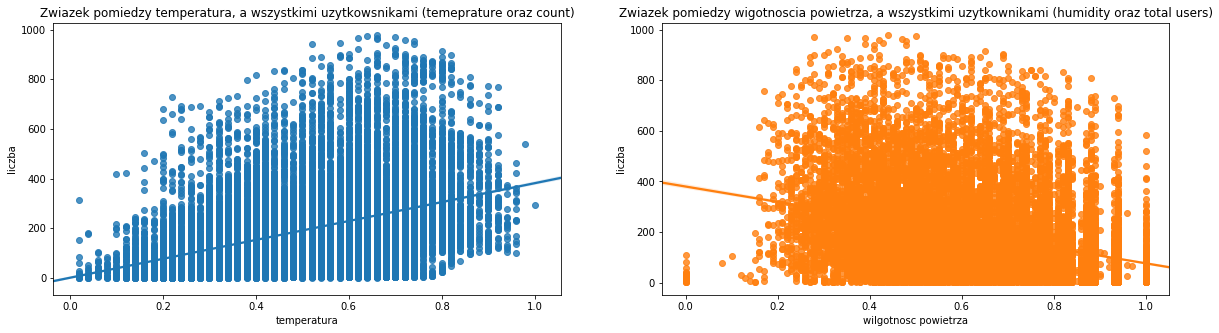

In [20]:
# Korelacja pomiedzy count, humidity oraz temp
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))

sn.regplot(x=data['temp'], y=data['count'], ax=ax1)
ax1.set(xlabel="temperatura", ylabel="liczba", title="Zwiazek pomiedzy temperatura, a wszystkimi uzytkowsnikami (temeprature oraz count)")

sn.regplot(x=data['humidity'], y=data['count'], ax=ax2)
ax2.set(xlabel="wilgotnosc powietrza", ylabel="liczba", title="Zwiazek pomiedzy wigotnoscia powietrza, a wszystkimi uzytkownikami (humidity oraz total users)")

[Text(0, 0.5, 'liczba'),
 Text(0.5, 0, 'dzien roboczy'),
 Text(0.5, 1.0, 'Boxplot - dni robocze')]

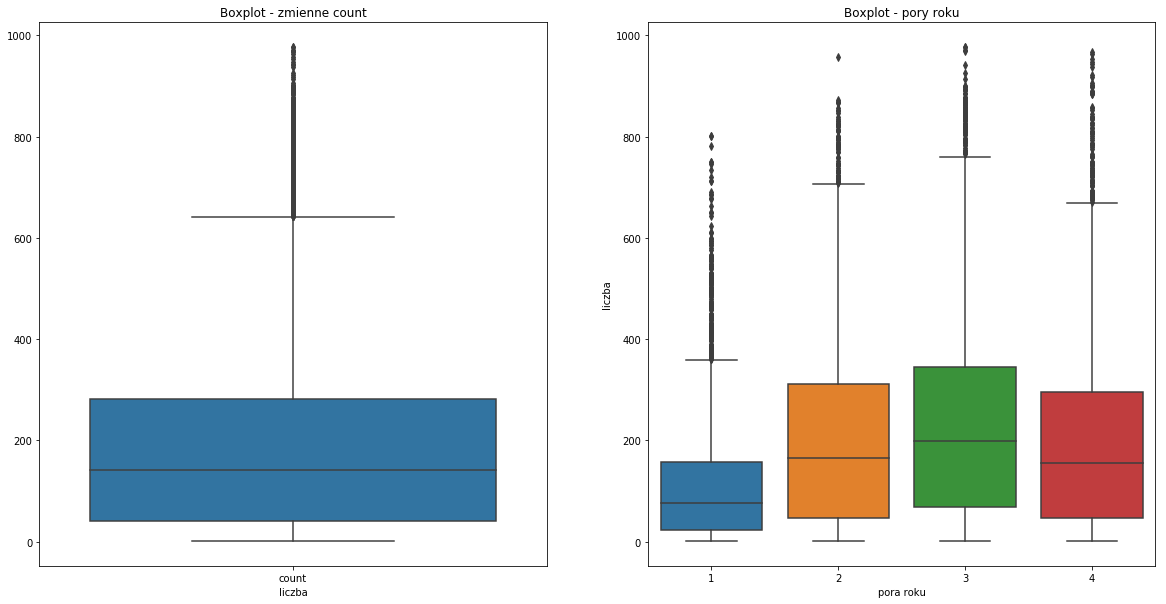

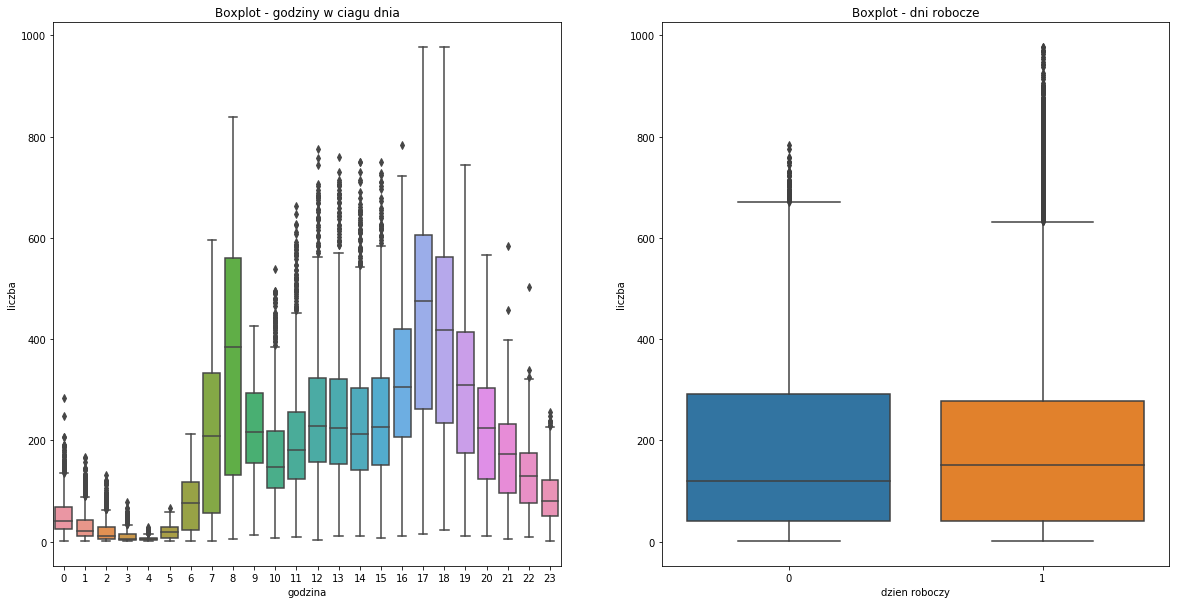

In [21]:
# Sprawdzenie wartosci odstajacych
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

sn.boxplot(data=data[['count']], ax=ax1)
ax1.set(xlabel="liczba", title="Boxplot - zmienne count")

sn.boxplot(x=data['season'],y=data['count'], ax=ax2)
ax2.set(xlabel="pora roku", ylabel="liczba", title="Boxplot - pory roku")

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,10))

sn.boxplot(x=data['hour'],y=data['count'], ax=ax1)
ax1.set(xlabel="godzina", ylabel="liczba", title="Boxplot - godziny w ciagu dnia")

sn.boxplot(x=data['workingday'],y=data['count'], ax=ax2)
ax2.set(xlabel="dzien roboczy", ylabel="liczba", title="Boxplot - dni robocze")

[Text(0.5, 1.0, 'Teoretyczne kwantyle')]

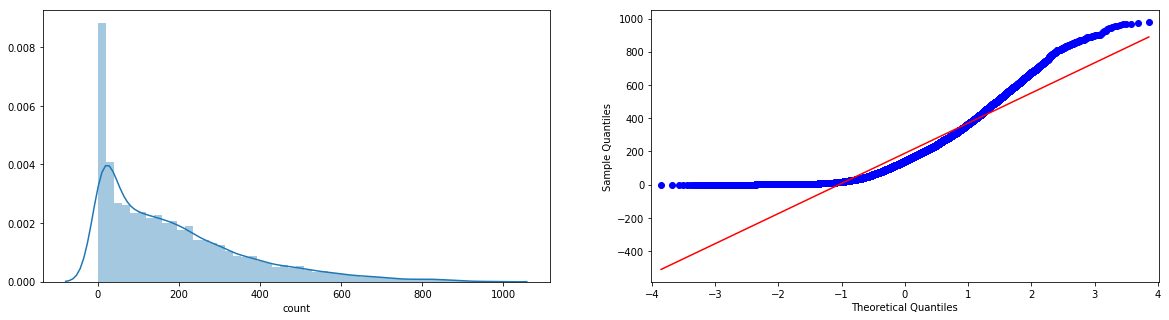

In [22]:
#Zmienna count nie ma rozkladu normalnego
#Zastosowsanie transformacji logarytmicznej, ma na celu przybliżenie do rozkladu normalnego
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))

sn.distplot(data['count'], ax=ax1)
ax.set(title="Dystrybucja po logarytmie ze zmiennej count")

qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Teoretyczne kwantyle")

In [23]:
import math
data['count'] = data['count'].transform(lambda x: math.log(x))

[Text(0.5, 1.0, 'Kwantyle teoretyczne')]

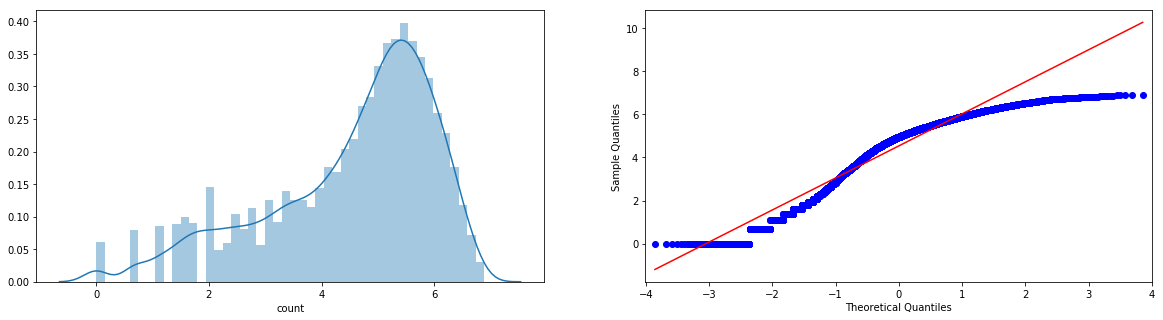

In [24]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))

sn.distplot(data['count'], ax=ax1)
ax.set(title="Dystrybucja po logarytmie ze zmiennej count")

qqplot(data['count'], line='s', ax=ax2)
ax.set(title="Kwantyle teoretyczne")

W zestawie danych mamy wartości kategoryczne, musimy sprawsić by algorytm rozróżniał, że wszytkie klasy mają taką samą wagę dla naszej analizy np. dni tygodnia. Technika one hot encoding to proces, w którym konwertujemy zmienne kategoryczne na kategorie binarne. Przy okazji, gdy zastosujemy tą technikę, ważne jest, aby pozostawić jedną zmienną na zewnątrz, aby uniknąć wieloliniowości. Dlatego drop_first jest ustawiony na True.

In [25]:
#Technika one hot encoding
#Dummify - Converts data of any kind to numeric values. A factor is expanded to a set of dummy variables.
#Ta funkcja konwertuje dane na wartości liczbowe, aby użytkownik mógł je obliczyć, 
#na przykład średnia, wariancja, kowariancja i korelacja danych.
data_dummy = data

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weather']
for column in columns_to_dummify:
    data_dummy = dummify_dataset(data_dummy, column)
    
data_dummy.head(1)

,temp,humidity,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,0.24,0.81,2.772589,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Gdy dane nie są normalnie dystrybuowane, możemy zastosować transformację nieliniową, aby spróbować rozwiązać ten problem. W tych przypadkach możemy również użyć nieparametrycznego algorytmu.
Możemy szybko przetestować wydajność algorytmów za pomocą funkcji model_selection.cross_val_score.
Na początku dzielimy dataset na zbiór testowsy i trenowany.

In [26]:
from sklearn.model_selection import train_test_split

y = data_dummy['count']
X = data_dummy.drop(['count'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor

models = [LinearRegression(),
          Ridge(),
          HuberRegressor(),
          ElasticNetCV(),
          DecisionTreeRegressor(), 
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          BaggingRegressor()]

def test_algorithms(model):
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    predicted = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(predicted.mean())
    
for model in models:
    test_algorithms(model)

-0.4471553058236652
-0.44400515546158104
-0.4609914128033906


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value

-0.44417289974923246
-0.4523544470841652


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

-0.25803280101221465
-0.35049510306049625


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

-0.2695311368904412
-0.2670470693436295


Algorytm ExtraTreeRegressor miał dobrą wydajność, co jest akceptowalne, ponieważ metody drzew są ogólnie niewrażliwe na wartości odstające. 
Pierwszy test - test wydajności. Nie zmieniamy żadnego hiperparametru ani liczby zmiennych. Jak zachowuje się model, sprawdzający Root Mean Squared Logarithm Error? 
Mamy błąd 0,15.

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


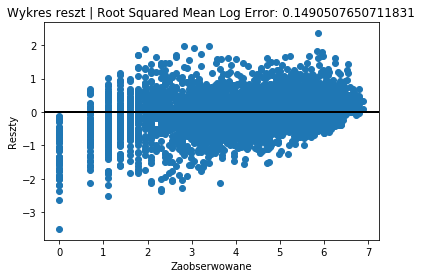

In [29]:
from sklearn.metrics import mean_squared_log_error
 
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print()

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Zaobserwowane')
ax.set_ylabel('Reszty')
ax.title.set_text('Wykres reszt | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred))))
plt.show()

Poprawa modelu

Możemy pozbyć się funkcji, które nie są ważne dla modelu (redukcja wymiarowości), by potem dostroić algorytm, testując dla niego różne konfiguracje.

Do redukcji wymiarów można użyć techniki liniowej zwanej analizą głównych składowych (PCA). PCA działa poprzez tworzenie liniowego odwzorowania danych w przestrzeni o niższych wymiarach i odbudowywanie jego wariancji.

Stwsorzono wykres wyjaśniający wariancję danych według liczby zmiennych. Celem jest znalezienie „punktu przerwania” na wykresie, który będzie odpowiadał optymalnej liczbie zmiennych. Możemy również dostroić nasz algorytm, testując różne parametry (GridSearchCV).

Text(0, 0.5, 'Wariancja wyjaśniona')

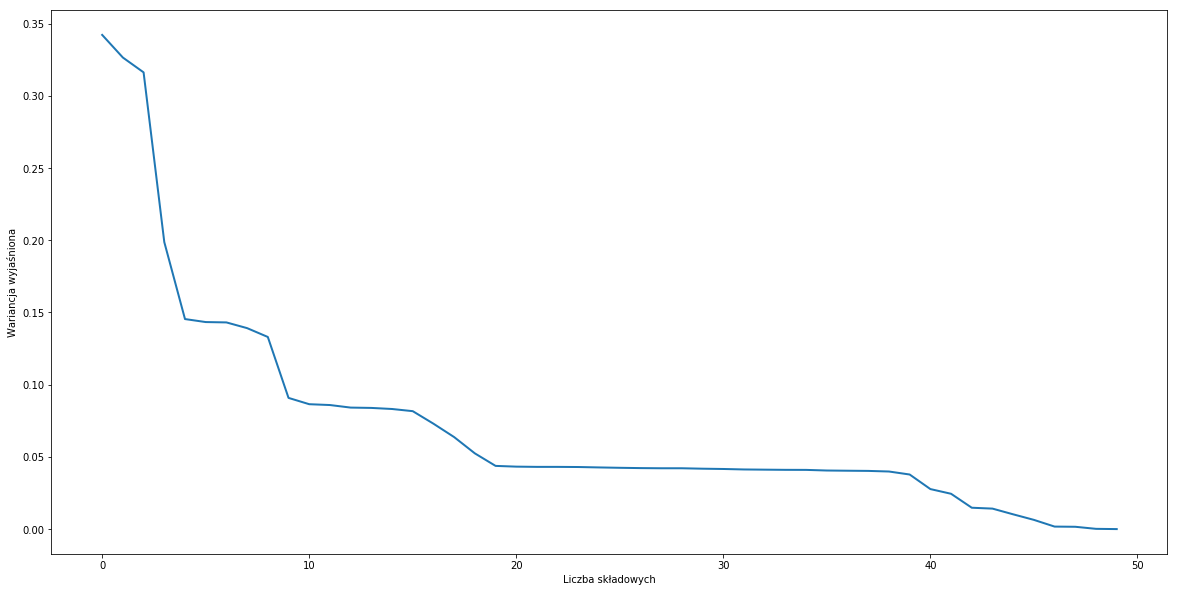

In [30]:
from sklearn import decomposition

# Plot PCA spectrum
pca = decomposition.PCA()
pca.fit(X_train)

plt.figure(1, figsize=(20, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Liczba składowych')
plt.ylabel('Wariancja wyjaśniona')

In [31]:
from sklearn.pipeline import Pipeline

etr = ExtraTreesRegressor()

pipeline = Pipeline(steps=[('pca', pca), 
                           ('etr', etr)])

from sklearn.model_selection import GridSearchCV

print(pipeline.get_params())

{'memory': None, 'steps': [('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('etr', ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False))], 'pca': PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False), 'etr': ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
    

In [32]:
hyperparameters = {'etr__n_estimators' : [10,100,500],
                   'etr__max_depth' : [None, 20, 50],
                   'pca__n_components' : [9,19,39]}

In [33]:
clf = GridSearchCV(pipeline,
                   hyperparameters,
                   cv=10)

In [34]:
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Best params
print(clf.best_params_)

Teraz, gdy wybraliśmy najlepsze parametry, możemy ponownie sprawdzić błąd. Teraz wyniósł 0,14.

In [ ]:
y_pred = clf.predict(X_test)

# Plot the residuals
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(np.sqrt(mean_squared_log_error(y_test, y_pred))))
plt.show()